# Import Libraries

In [2]:
import numpy as np
import pandas as pd


# Import Data

In [4]:
# Import data.
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
feature_df = pd.read_csv('feature.csv')

# Explore Data

In [6]:
inputs = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis=0)

In [7]:
inputs = inputs[inputs['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [8]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [9]:
inputs.shape

(57475, 198)

In [10]:
inputs.isnull().sum()

Unnamed: 0                               0
id                                       0
loan_amnt                                0
funded_amnt                              0
funded_amnt_inv                          0
term                                     0
int_rate                                 0
installment                              0
grade                                    0
sub_grade                                0
emp_length                               0
home_ownership                           0
annual_inc                               0
verification_status                      0
issue_d                                  0
loan_status                              0
purpose                                  0
addr_state                               0
dti                                      0
delinq_2yrs                              0
earliest_cr_line                         0
fico_range_low                           0
fico_range_high                          0
inq_last_6m

# Dependent Variables

In [12]:
inputs['CCF'] = (inputs['funded_amnt'] - inputs['total_rec_prncp']) / inputs['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

In [13]:
inputs['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    57475.000000
mean         0.689559
std          0.218372
min          0.000000
25%          0.557010
50%          0.738526
75%          0.863887
max          1.000000
Name: CCF, dtype: float64

# Explore Dependent Variables

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([  22.,   19.,   17.,  120.,   22.,   18.,  162.,   50.,   27.,
         174.,  122.,   41.,  123.,  170.,   63.,  149.,  212.,   98.,
         132.,  205.,  134.,  155.,  247.,  169.,  173.,  233.,  216.,
         228.,  244.,  190.,  261.,  310.,  259.,  282.,  367.,  300.,
         278.,  351.,  312.,  320.,  391.,  362.,  379.,  449.,  383.,
         438.,  476.,  453.,  473.,  493.,  487.,  569.,  519.,  535.,
         571.,  597.,  631.,  712.,  596.,  629.,  687.,  715.,  708.,
         710.,  768.,  839.,  785.,  845.,  927.,  862.,  936., 1023.,
         944., 1019., 1019., 1073., 1050., 1033., 1140., 1098., 1171.,
        1183., 1089., 1380., 1170., 1273., 1359., 1215., 1431., 1134.,
        1526., 1224., 1021., 1330.,  838., 1331.,  665.,  917.,  378.,
         541.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

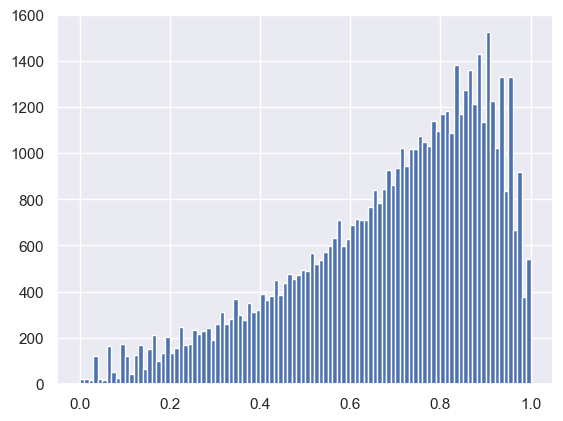

In [16]:
plt.hist(inputs['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [17]:
feature_name = feature_df.to_numpy()
feature_name = feature_name.flatten().tolist()
feature_name

['grade_woe',
 'home_ownership_woe',
 'addr_state_woe',
 'loan_amnt_scaled',
 'int_rate_scaled',
 'installment_scaled',
 'annual_inc_scaled',
 'fico_range_high_scaled',
 'inq_last_6mths_scaled',
 'mths_since_last_delinq_scaled',
 'mths_since_last_record_scaled',
 'revol_bal_scaled',
 'revol_util_scaled',
 'out_prncp_inv_scaled',
 'total_pymnt_inv_scaled',
 'total_rec_prncp_scaled',
 'last_pymnt_amnt_scaled',
 'last_fico_range_high_scaled',
 'last_fico_range_low_scaled',
 'open_il_12m_scaled',
 'total_bal_il_scaled',
 'il_util_scaled',
 'total_rev_hi_lim_scaled',
 'total_cu_tl_scaled',
 'bc_open_to_buy_scaled',
 'bc_util_scaled',
 'mo_sin_old_il_acct_scaled',
 'mo_sin_old_rev_tl_op_scaled',
 'mo_sin_rcnt_rev_tl_op_scaled',
 'mo_sin_rcnt_tl_scaled',
 'mths_since_recent_bc_scaled',
 'mths_since_recent_bc_dlq_scaled',
 'mths_since_recent_revol_delinq_scaled',
 'num_accts_ever_120_pd_scaled',
 'num_actv_bc_tl_scaled',
 'num_bc_sats_scaled',
 'num_bc_tl_scaled',
 'num_tl_120dpd_2m_scaled',
 

In [18]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs = inputs.loc[: , feature_name + ['CCF']]
pd.options.display.max_columns = None
inputs.head()

,grade_woe,home_ownership_woe,addr_state_woe,loan_amnt_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,revol_bal_scaled,revol_util_scaled,out_prncp_inv_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,open_il_12m_scaled,total_bal_il_scaled,il_util_scaled,total_rev_hi_lim_scaled,total_cu_tl_scaled,bc_open_to_buy_scaled,bc_util_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_bc_sats_scaled,num_bc_tl_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,emp_length_int_scaled,term_int_scaled,mths_since_issue_d_scaled,CCF
12,0.684812,1.000000,0.217322,0.137056,0.111414,0.099374,0.000902,0.180995,0.107143,0.096591,0.338843,0.001963,0.133261,0.0,0.050938,0.066279,0.004548,0.592941,0.591716,0.00,0.000000,0.000000,0.00205,0.0,0.019754,0.097571,0.201657,0.187187,0.012723,0.008475,0.008197,0.000000,0.000000,0.000000,0.127660,0.147541,0.279412,0.0,0.0,0.0,0.233333,1.000,0.143,1.0,0.0,0.253968,0.558138
16,0.152286,0.177957,0.217322,0.873096,0.579665,0.756554,0.001967,0.158371,0.000000,0.022727,0.000000,0.014691,0.348321,0.0,0.103742,0.092452,0.031464,0.587059,0.000000,0.00,0.000000,0.000000,0.00587,0.0,0.047921,0.251959,0.167127,0.332332,0.129771,0.012712,0.083607,0.020513,0.022727,0.029412,0.063830,0.114754,0.132353,0.0,0.0,0.0,0.066667,0.722,0.600,0.4,0.0,0.325397,0.894340
17,0.465864,1.000000,0.476097,0.619289,0.298792,0.484401,0.002213,0.203620,0.071429,0.102273,0.033058,0.010518,0.230228,0.0,0.120008,0.134323,0.020318,0.592941,0.591716,0.00,0.000000,0.000000,0.00753,0.0,0.086832,0.200235,0.103591,0.151151,0.025445,0.042373,0.016393,0.092308,0.102273,0.000000,0.148936,0.147541,0.205882,0.0,0.0,0.0,0.066667,0.885,0.222,1.0,0.0,0.277778,0.785083
18,0.297181,0.524021,0.320177,0.365482,0.503701,0.213891,0.000656,0.226244,0.000000,0.000000,0.297521,0.004576,0.263272,0.0,0.149753,0.064667,0.009238,0.757647,0.757396,0.00,0.040057,0.235294,0.00242,0.0,0.020028,0.221787,0.073204,0.037037,0.020356,0.033898,0.013115,0.000000,0.000000,0.000000,0.106383,0.081967,0.073529,0.0,0.0,0.0,0.100000,1.000,0.200,1.0,1.0,0.150794,0.827555
26,0.465864,0.177957,0.270120,0.238579,0.337748,0.189613,0.000902,0.158371,0.000000,0.232955,0.793388,0.004275,0.352113,0.0,0.096838,0.065654,0.008244,0.769412,0.769231,0.04,0.020066,0.287926,0.00169,0.0,0.000000,0.392633,0.162983,0.300300,0.005089,0.008475,0.037705,0.000000,0.232955,0.000000,0.021277,0.032787,0.029412,0.0,0.0,0.0,0.066667,0.944,1.000,0.0,0.0,0.103175,0.737384


In [19]:
corr_matrix = pd.DataFrame(inputs).corr()
print(corr_matrix)

                                       grade_woe  home_ownership_woe  \
grade_woe                               1.000000            0.033585   
home_ownership_woe                      0.033585            1.000000   
addr_state_woe                         -0.001204           -0.093619   
loan_amnt_scaled                       -0.197867            0.173081   
int_rate_scaled                        -0.920906           -0.022735   
installment_scaled                     -0.204906            0.151267   
annual_inc_scaled                       0.032824            0.262678   
fico_range_high_scaled                  0.297253            0.009037   
inq_last_6mths_scaled                  -0.159585            0.090007   
mths_since_last_delinq_scaled          -0.022070            0.030133   
mths_since_last_record_scaled          -0.025105           -0.004515   
revol_bal_scaled                        0.018379            0.181673   
revol_util_scaled                      -0.163554            0.08

In [20]:
inputs['out_prncp_inv_scaled'].sum()

0.0

Nous remarquons que certaines variables sont corréllés, nous allons supprimer à chaque fois une des deux varaibles qui sont trop corrélées : 

- loan_amnt_scaled et installment_scaled
- percent_bc_gt_75_scaled et bc_util_scaled
- num_bc_sats_scaled et num_bc_tl_scaled


In [22]:
vars_to_drop = set(['installment_scaled', 'percent_bc_gt_75_scaled', 'num_bc_tl_scaled', 'out_prncp_inv_scaled'])

feature_name = [feature for feature in feature_name if feature not in vars_to_drop]

inputs = inputs.loc[: , feature_name + ['CCF']]

# EAD Model

### Estimation and Interpretation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(inputs.drop(['CCF'], axis = 1), inputs['CCF'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [26]:
ead_inputs_train.columns.values

array(['grade_woe', 'home_ownership_woe', 'addr_state_woe',
       'loan_amnt_scaled', 'int_rate_scaled', 'annual_inc_scaled',
       'fico_range_high_scaled', 'inq_last_6mths_scaled',
       'mths_since_last_delinq_scaled', 'mths_since_last_record_scaled',
       'revol_bal_scaled', 'revol_util_scaled', 'total_pymnt_inv_scaled',
       'total_rec_prncp_scaled', 'last_pymnt_amnt_scaled',
       'last_fico_range_high_scaled', 'last_fico_range_low_scaled',
       'open_il_12m_scaled', 'total_bal_il_scaled', 'il_util_scaled',
       'total_rev_hi_lim_scaled', 'total_cu_tl_scaled',
       'bc_open_to_buy_scaled', 'bc_util_scaled',
       'mo_sin_old_il_acct_scaled', 'mo_sin_old_rev_tl_op_scaled',
       'mo_sin_rcnt_rev_tl_op_scaled', 'mo_sin_rcnt_tl_scaled',
       'mths_since_recent_bc_scaled', 'mths_since_recent_bc_dlq_scaled',
       'mths_since_recent_revol_delinq_scaled',
       'num_accts_ever_120_pd_scaled', 'num_actv_bc_tl_scaled',
       'num_bc_sats_scaled', 'num_tl_120dpd_2m_sc

In [27]:
from sklearn import linear_model
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (n_features,)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
        # Initialisation correcte du constructeur de la classe parente
        super(LinearRegression, self).__init__(fit_intercept=fit_intercept,
                                               copy_X=copy_X,
                                               n_jobs=n_jobs, positive=positive)
    
    def fit(self, X, y):
        # Appel à la méthode fit de la classe parente
        super(LinearRegression, self).fit(X, y)

        # Calcul du SSE (Sum of Squared Errors)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])

        # Calcul de l'erreur standard (SE)
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # Calcul du t-statistic pour chaque coefficient
        self.t = self.coef_ / se

        # Calcul des p-values pour chaque coefficient
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), X.shape[0] - X.shape[1])))
        
        return self

In [28]:
ead_inputs_train.head()

,grade_woe,home_ownership_woe,addr_state_woe,loan_amnt_scaled,int_rate_scaled,annual_inc_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,revol_bal_scaled,revol_util_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,open_il_12m_scaled,total_bal_il_scaled,il_util_scaled,total_rev_hi_lim_scaled,total_cu_tl_scaled,bc_open_to_buy_scaled,bc_util_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_bc_sats_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,emp_length_int_scaled,term_int_scaled,mths_since_issue_d_scaled
157840,0.038748,1.000000,0.203818,0.732234,0.747176,0.001180,0.384615,0.035714,0.000000,0.0,0.025079,0.444204,0.212485,0.077594,0.020645,0.698824,0.698225,0.00,0.000000,0.00000,0.00786,0.000000,0.004673,0.372649,0.180939,0.262262,0.017812,0.029661,0.011475,0.00000,0.000000,0.0,0.106383,0.081967,0.0,0.0,0.0,0.066667,1.000,0.3,1.0,0.301587
296876,0.465864,0.177957,0.217322,0.746193,0.427347,0.001574,0.248869,0.035714,0.159091,0.0,0.013828,0.432286,0.303239,0.329641,0.025547,0.687059,0.686391,0.00,0.000000,0.00000,0.00445,0.000000,0.015227,0.327194,0.176796,0.235235,0.117048,0.088983,0.149180,0.14359,0.159091,0.0,0.106383,0.098361,0.0,0.0,0.0,0.000000,0.950,0.4,0.0,0.428571
59234,0.465864,0.177957,0.254861,0.390863,0.259836,0.000599,0.384615,0.035714,0.000000,0.0,0.006711,0.250271,0.245277,0.298359,0.012818,0.634118,0.633136,0.00,0.010330,0.22291,0.00373,0.018018,0.004957,0.337774,0.167127,0.300300,0.010178,0.016949,0.037705,0.00000,0.000000,0.0,0.042553,0.032787,0.0,0.0,0.0,0.100000,1.000,0.0,0.0,0.166667
154545,0.152286,1.000000,0.409952,0.238579,0.414102,0.000630,0.248869,0.035714,0.000000,0.0,0.003097,0.525460,0.057736,0.026022,0.005860,0.769412,0.769231,0.00,0.000000,0.00000,0.00100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,1.0,1.0,0.666667
156770,0.152286,0.524021,0.409952,0.746193,0.817296,0.003934,0.226244,0.000000,0.204545,0.0,0.019979,0.469664,0.143037,0.067948,0.021797,0.592941,0.591716,0.04,0.153323,0.00000,0.00540,0.018018,0.006116,0.339734,0.215470,0.140140,0.076336,0.029661,0.049180,0.00000,0.000000,0.0,0.106383,0.081967,0.0,0.0,0.0,0.066667,0.769,1.0,1.0,0.015873


In [29]:
ead_targets_train.head()

157840    0.894609
296876    0.560479
59234     0.254103
154545    0.895911
156770    0.909403
Name: CCF, dtype: float64

In [30]:
reg_ead = LinearRegression()
# We create an instance of an object from the 'LinearRegression' class.
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LinearRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [31]:
feature_name = ead_inputs_train.columns.values

In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_ead.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.635586,NaN
1,grade_woe,-0.042142,0.000000e+00
2,home_ownership_woe,-0.000449,7.612726e-01
3,addr_state_woe,0.009481,4.471682e-02
4,loan_amnt_scaled,0.558875,0.000000e+00
5,int_rate_scaled,0.000303,9.606584e-01
6,annual_inc_scaled,0.127902,2.359556e-01
7,fico_range_high_scaled,0.017559,1.636614e-03
8,inq_last_6mths_scaled,0.038756,1.555320e-03
9,mths_since_last_delinq_scaled,-0.003209,5.169769e-01


### Model Validation

In [34]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [35]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,11495.000000
mean,0.689812
std,0.190300
min,-0.481859
25%,0.599026
50%,0.698877
75%,0.802364
max,1.303095


In [36]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [37]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,11495.000000
mean,0.687524
std,0.180137
min,0.000000
25%,0.599026
50%,0.698877
75%,0.802364
max,1.000000


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supposons que tu as déjà les valeurs réelles et prédites :
# y_true : valeurs réelles de l'EAD
# y_pred : valeurs prédites de l'EAD par ton modèle

# Dans ton cas :
y_true = ead_targets_test.reset_index(drop=True)
y_pred = y_hat_test_ead

# Calcul du MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calcul du MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calcul du RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calcul du R²
r2 = r2_score(y_true, y_pred)
print(f"Coefficient of Determination (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0742
Mean Squared Error (MSE): 0.0108
Root Mean Squared Error (RMSE): 0.1041
Coefficient of Determination (R²): 0.7714


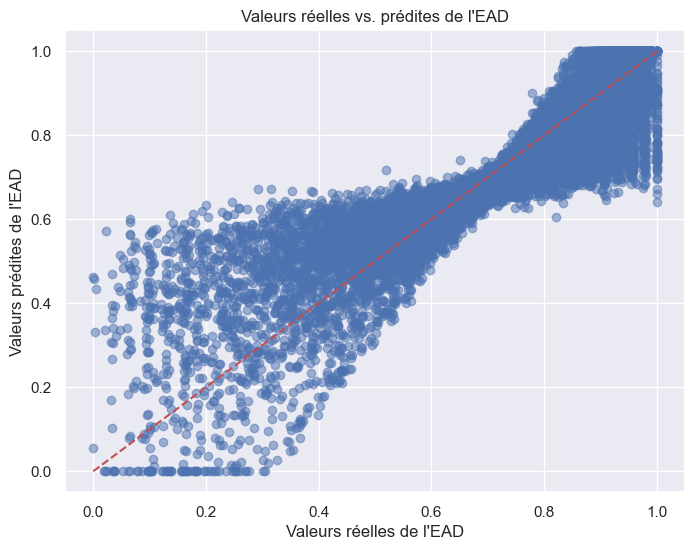

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Valeurs réelles de l\'EAD')
plt.ylabel('Valeurs prédites de l\'EAD')
plt.title('Valeurs réelles vs. prédites de l\'EAD')
plt.show()

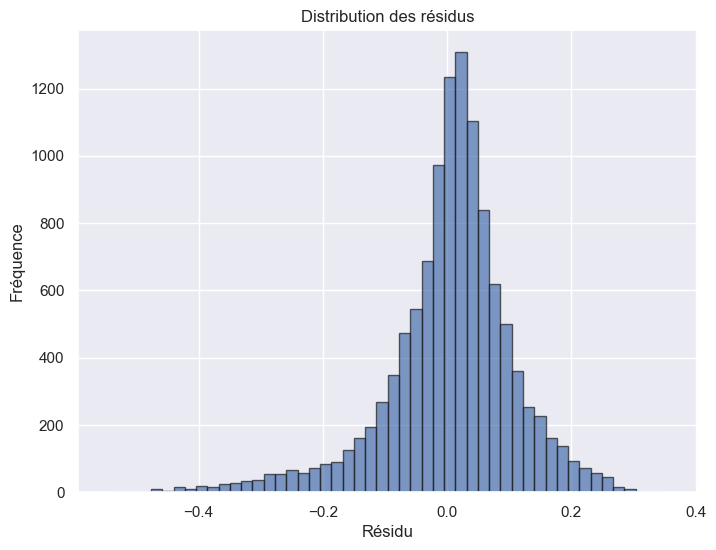

In [40]:
residuals = y_true - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Résidu')
plt.ylabel('Fréquence')
plt.title('Distribution des résidus')
plt.show()

In [41]:
import pickle
pickle.dump(reg_ead, open('ead_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'ead_model.sav'.

# Convert numpy array to DataFrame
feature_df = pd.DataFrame(feature_name)

# Export to CSV
feature_df.to_csv('feature_ead.csv', index=False)